<a href="https://colab.research.google.com/github/JahedNaghipoor/Machine-Learning/blob/master/Decision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Decision Trees and Random Forest - Amazon review 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# The code was removed by Watson Studio for sharing.

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [ ]:
positive = df[ df['feedback']== 1]
negative = df[ df['feedback']== 0]

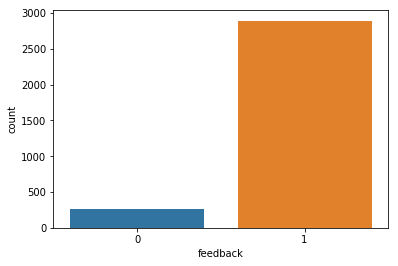

In [ ]:
sns.countplot(df['feedback'], label='Count')

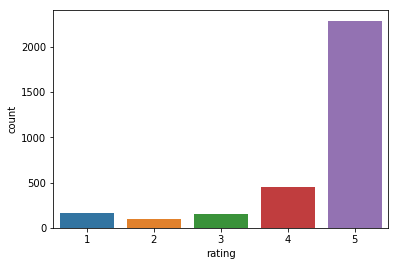

In [ ]:
sns.countplot(df['rating'], label='Count')

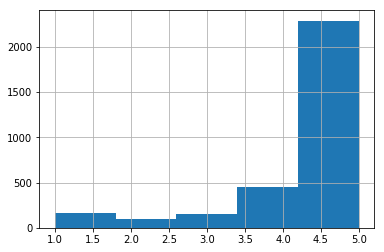

In [ ]:
df['rating'].hist(bins=5)

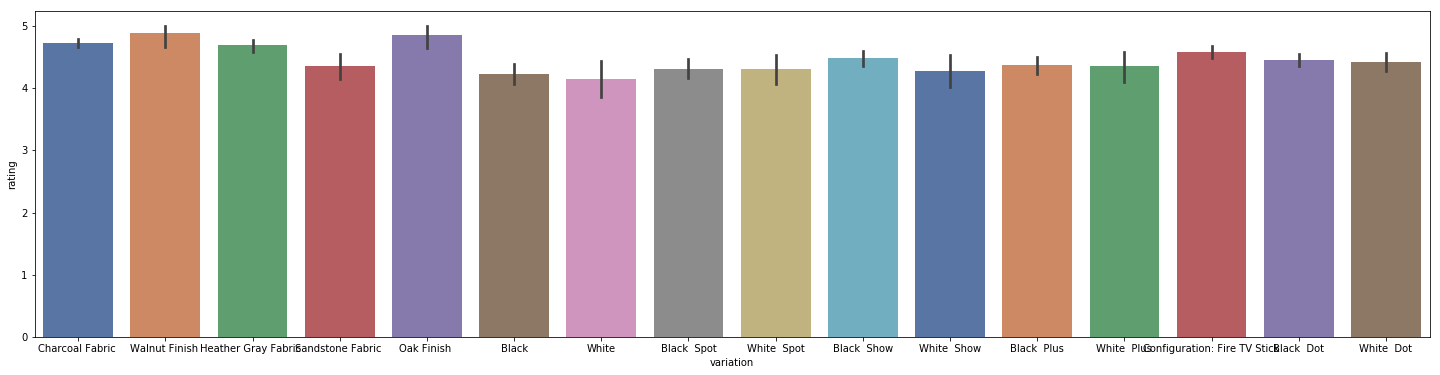

In [ ]:
plt.figure( figsize=(25,6))
sns.barplot(x='variation', y='rating', data = df, palette='deep')

In [ ]:
# cleanup
df = df.drop(['feedback', 'date'], axis=1)

In [ ]:
# change variables to (0,1)
variaton_dummies = pd.get_dummies(df['variation'], drop_first=True)

In [ ]:
variaton_dummies.head(10)

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.drop(['variation'], axis=1, inplace=True)

In [ ]:
#create new column (length of review!!) to increase prediction 
#df['length'] = df['verified_reviews'].apply(len)

In [ ]:
df= pd.concat([df, variaton_dummies], axis = 1)

In [ ]:
df.head(10)

,rating,verified_reviews,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,Love my Echo!,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,5,I received the echo as a gift. I needed anothe...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,3,"Without having a cellphone, I cannot use many ...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,5,I think this is the 5th one I've purchased. I'...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,5,looks great,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,5,Love it! I’ve listened to songs I haven’t hear...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_vecorizer = vectorizer.fit_transform(df['verified_reviews'])

In [ ]:
# change words in reviews to columns
count_vecorizer.shape

(3150, 4044)

In [ ]:
# convert to array and make a dataframe from encoded reviews
encoded_reviews = pd.DataFrame(count_vecorizer.toarray())

In [ ]:
df.drop(['verified_reviews'], axis=1, inplace=True)

In [ ]:
# concatination encoded reviews to the main dataframe
df = pd.concat([df, encoded_reviews], axis=1)

In [ ]:
df.head(10)

,rating,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(['rating'], axis=1)
y = df['rating']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [ ]:
# train the model
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
#predicion for training
y_predict_train = randomforest_classifier.predict(X_train)

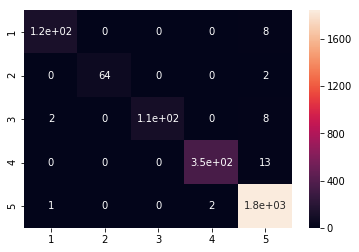

In [ ]:
cm  = confusion_matrix(y_train, y_predict_train)
x_axis_labels = y_axis_labels =  [1,2,3,4,5]
sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
print(classification_report(y_train, y_predict_train))
# 99% correct prediction for train

              precision    recall  f1-score   support

           1       0.98      0.94      0.96       132
           2       1.00      0.97      0.98        66
           3       1.00      0.91      0.95       116
           4       0.99      0.96      0.98       361
           5       0.98      1.00      0.99      1845

   micro avg       0.99      0.99      0.99      2520
   macro avg       0.99      0.96      0.97      2520
weighted avg       0.99      0.99      0.99      2520



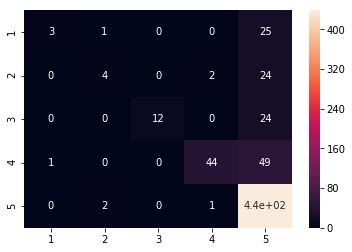

In [ ]:
#predicion for testing 
y_predict_test = randomforest_classifier.predict(X_test)
cm  = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm,  annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
print(classification_report(y_test, y_predict_test))
# pediction 81% from test data!

              precision    recall  f1-score   support

           1       0.75      0.10      0.18        29
           2       0.57      0.13      0.22        30
           3       1.00      0.33      0.50        36
           4       0.94      0.47      0.62        94
           5       0.78      0.99      0.88       441

   micro avg       0.80      0.80      0.80       630
   macro avg       0.81      0.41      0.48       630
weighted avg       0.81      0.80      0.75       630

